<a href="https://colab.research.google.com/github/syedmahmoodiagents/Speech/blob/main/Librosa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip install librosa pydub

In [ ]:
import librosa
import librosa.display
from pydub import AudioSegment
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal

In [ ]:
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = 'drive/MyDrive'

In [ ]:
# os.listdir('drive/MyDrive')

In [ ]:
# Load audio file (y = waveform array, sr = sampling rate)
y, sr = librosa.load(path + "/file_example_MP3_700KB.mp3", sr=None)  # sr=None keeps original sample rate

In [ ]:
y

array([1.7182100e-06, 1.8538897e-06, 1.9645518e-06, ..., 7.6522849e-07,
       1.0209543e-06, 1.2429875e-06], dtype=float32)

In [ ]:
sr

44100

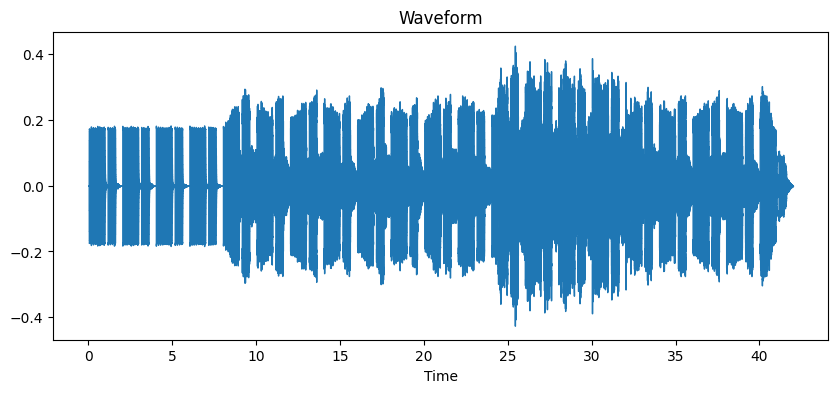

In [ ]:
# Display waveform
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y, sr=sr)
plt.title("Waveform")
plt.show()

In [ ]:
# Get duration
duration = librosa.get_duration(y=y, sr=sr)
print(f"Duration: {duration:.2f} seconds")

Duration: 42.01 seconds


The code snippet n_mfcc=13 is a parameter within the librosa.feature.mfcc() function. It specifies the number of Mel-Frequency Cepstral Coefficients (MFCCs) to extract from the audio. MFCCs are a representation of the short-term power spectrum of a sound. The number of coefficients (n_mfcc) determines the dimensionality of this representation. In the code, n_mfcc=13 is used, meaning 13 MFCCs are calculated for each frame of the audio. This is a common number of coefficients used in various audio analysis tasks.

In [ ]:
# Extract MFCCs (Mel-Frequency Cepstral Coefficients)
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
print("MFCC shape:", mfccs.shape)

MFCC shape: (13, 3619)


In [ ]:
mfccs

array([[-567.2888   , -484.28915  , -477.1873   , ..., -605.3949   ,
        -608.9328   , -615.8617   ],
       [  74.299835 ,  163.45572  ,  171.21356  , ...,   24.688574 ,
          19.753696 ,   10.039636 ],
       [  62.08217  ,   93.63372  ,   97.48944  , ...,   24.08538  ,
          19.349453 ,    9.887224 ],
       ...,
       [  -4.8153667,   -7.0290623,   -7.369768 , ...,   10.487085 ,
           9.219953 ,    5.875205 ],
       [  -5.5192194,  -10.556452 ,  -11.577373 , ...,    8.480415 ,
           7.625472 ,    5.194759 ],
       [  -6.1894417,  -11.999731 ,  -13.072496 , ...,    6.542738 ,
           6.0903034,    4.519086 ]], dtype=float32)

In [ ]:
# Load audio file (supports mp3, wav, etc.)
audio = AudioSegment.from_file(path + "/file_example_MP3_700KB.mp3")

In [ ]:
audio

In [ ]:
# Trim first 5 seconds
trimmed = audio[5000:]  # from 5 sec to end

In [ ]:
# Change volume (+5 dB)
louder = trimmed + 5

In [ ]:
louder

In [ ]:
louder.export("output.wav", format="wav")

<_io.BufferedRandom name='output.wav'>

In [ ]:
# audio = AudioSegment.from_file(path + "/file_example_MP3_700KB.mp3")
# trimmed = audio[5000:10000]  # from 5 sec to 10 sec
# trimmed.export("temp.wav", format="wav")

In [ ]:
y, sr = librosa.load("output.wav", sr=None)

In [ ]:
y.shape

(1632052,)

In [ ]:
sr

44100

In [ ]:
tempo, _ = librosa.beat.beat_track(y=y, sr=sr)

In [ ]:
print(f"Estimated Tempo: {tempo[0]:.2f} BPM")
# tempo

Estimated Tempo: 95.70 BPM


In [ ]:
_

array([  46,  100,  154,  208,  261,  315,  369,  423,  477,  530,  579,
        628,  682,  735,  789,  843,  897,  951, 1004, 1058, 1112, 1166,
       1220, 1269, 1317, 1371, 1424, 1478, 1532, 1586, 1640, 1694, 1747,
       1801, 1855, 1908, 1957, 2006, 2060, 2113, 2167, 2221, 2275, 2329,
       2383, 2436, 2490, 2544, 2598, 2647, 2695, 2749, 2802, 2856, 2910,
       2964, 3018])

## Using Example

In [ ]:
librosa.util.list_examples()

AVAILABLE EXAMPLES
--------------------------------------------------------------------
brahms    	Brahms - Hungarian Dance #5
choice    	Admiral Bob - Choice (drum+bass)
fishin    	Karissa Hobbs - Let's Go Fishin'
humpback  	Glacier Bay 60-second clip humpback whale song November 2020
libri1    	Ashiel Mystery - A Detective Story, chapter 2, narrated by Garth Comira
libri2    	The Age of Chivalry / Chapter 18: Perceval / Read by Anders Lankford
libri3    	Sense and Sensibility / Chapter 18 / Jane Austen / Read by Heather Barnett
nutcracker	Tchaikovsky - Dance of the Sugar Plum Fairy
pistachio 	The Piano Lady - Pistachio Ice Cream Ragtime
robin     	Bird Whistling, Robin, Single, 13.wav / InspectorJ
sweetwaltz	Setuniman - Sweet Waltz
trumpet   	Mihai Sorohan - Trumpet loop
vibeace   	Kevin MacLeod - Vibe Ace


In [ ]:
y, sr = librosa.load(librosa.example('trumpet'))

In [ ]:
y.shape

(117601,)

In [ ]:
sr

22050

In [ ]:
# Compute spectrogram
S = librosa.stft(y)

In [ ]:
S.shape

(1025, 230)

In [ ]:
S_db = librosa.amplitude_to_db(abs(S))

In [ ]:
S_db.shape

(1025, 230)

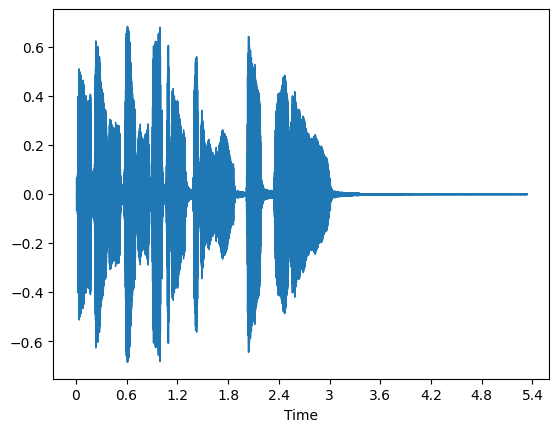

In [ ]:
librosa.display.waveshow(y, sr=sr)

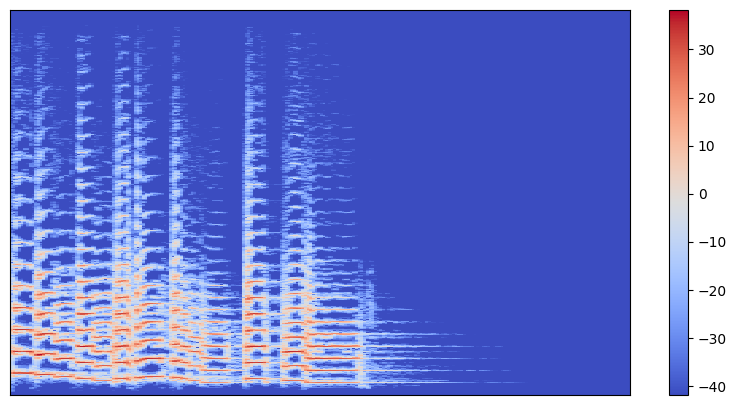

In [ ]:
# Display
plt.figure(figsize=(10, 5))
librosa.display.specshow(S_db, sr=sr)
plt.colorbar()

In [ ]:
# librosa.display.waveshow(y, sr=sr)

### Pitch extraction (fundamental frequency)

In [ ]:
f0, voiced_flag, voiced_probs = librosa.pyin(y, fmin=50, fmax=500, sr=sr)

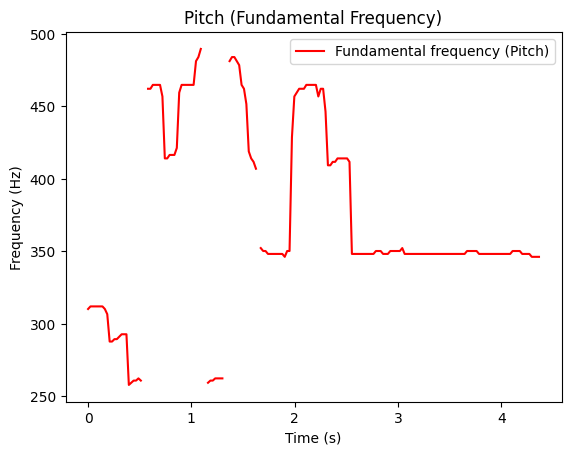

In [ ]:
times = librosa.times_like(f0, sr=sr)
plt.plot(times, f0, label='Fundamental frequency (Pitch)', color='r')
plt.title("Pitch (Fundamental Frequency)")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.legend()

### Timbre or Quality of Sound (MFCCs)

In [ ]:
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

Text(0.5, 1.0, 'MFCCs (Timbre features)')

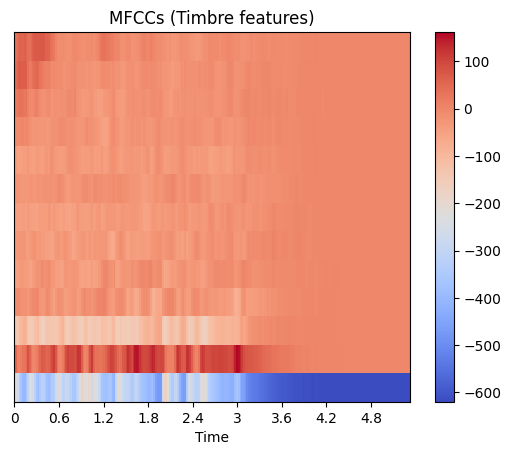

In [ ]:
librosa.display.specshow(mfccs, x_axis='time', sr=sr)
plt.colorbar()
plt.title("MFCCs (Timbre features)")

### Formants (using LPC approximation)

In [ ]:
def estimate_formants(frame, sr, order=12):
    # Apply a Hamming window
    frame = frame * np.hamming(len(frame))
    # LPC coefficients
    A = librosa.lpc(frame, order=order)
    # Roots of LPC polynomial
    rts = np.roots(A)
    rts = [r for r in rts if np.imag(r) >= 0.01]
    angz = np.arctan2(np.imag(rts), np.real(rts))
    freqs = sorted(angz * (sr / (2*np.pi)))
    return freqs[:3]  # First 3 formants


In [ ]:
# Take a short frame (~30 ms) from the middle of audio
frame_size = int(0.03 * sr)
midpoint = len(y)//2
frame = y[midpoint:midpoint+frame_size]
formants = estimate_formants(frame, sr)

In [ ]:
midpoint, frame.shape

(58800, (661,))

In [ ]:
y.shape

(117601,)

In [ ]:
formants

[np.float64(790.4430596952311),
 np.float64(1371.0723219287945),
 np.float64(2214.250892424988)]

# Power Spectrum

In [ ]:
# Take a short segment for clarity
y = y[:sr*2]  # 2 seconds

In [ ]:
# Compute FFT
N = len(y)
Y = np.fft.fft(y)
frequencies = np.fft.fftfreq(N, 1/sr)

In [ ]:
# Compute Power Spectrum (only positive frequencies)
power_spectrum = np.abs(Y)**2
positive_freqs = frequencies[:N//2]
positive_power = power_spectrum[:N//2]

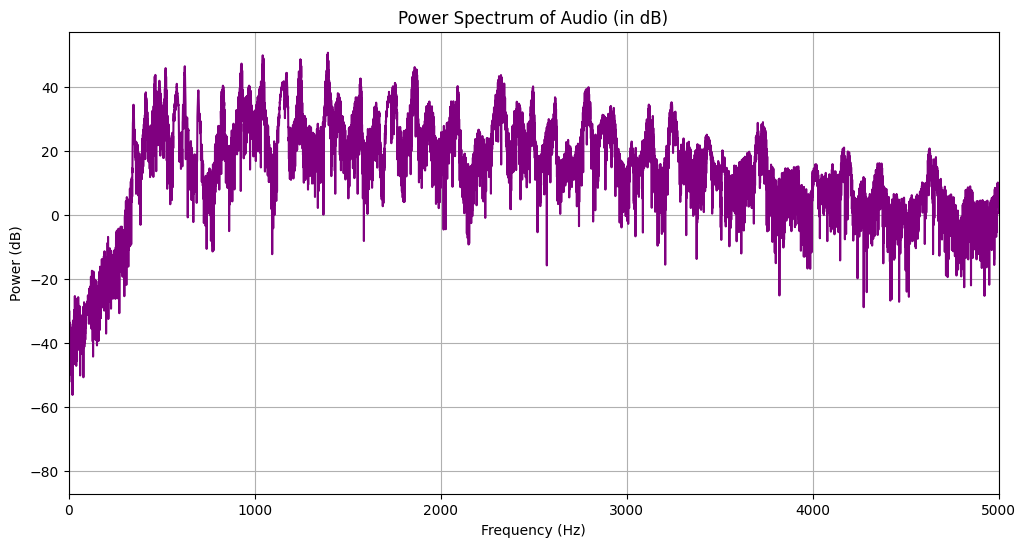

In [ ]:

plt.figure(figsize=(12, 6))
plt.plot(positive_freqs, 10*np.log10(positive_power), color='purple')
plt.title("Power Spectrum of Audio (in dB)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power (dB)")
plt.xlim(0, 5000)  # limit for visibility
plt.grid(True)
plt.show()


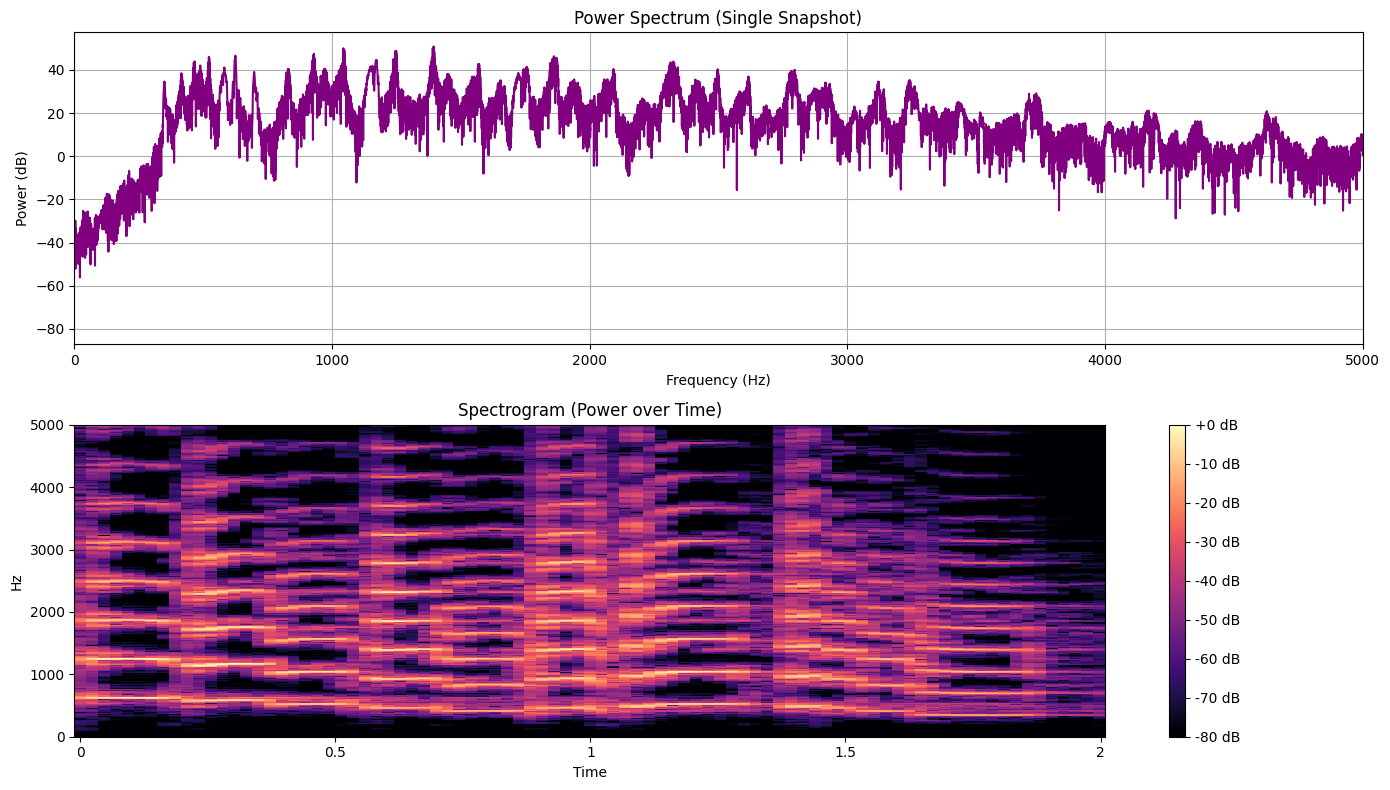

In [ ]:
# Compare Power Spectrum vs Spectrogram

import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display

# Load sample audio (trumpet)
y, sr = librosa.load(librosa.ex('trumpet'))

# Use first 2 seconds
y = y[:sr*2]

# ----- Power Spectrum (single snapshot) -----
N = len(y)
Y = np.fft.fft(y)
frequencies = np.fft.fftfreq(N, 1/sr)
power_spectrum = np.abs(Y)**2
positive_freqs = frequencies[:N//2]
positive_power = power_spectrum[:N//2]

# ----- Spectrogram (over time) -----
S = np.abs(librosa.stft(y))**2   # Power spectrogram
S_db = librosa.power_to_db(S, ref=np.max)

# ----- Plot both -----
plt.figure(figsize=(14, 8))

# Power Spectrum
plt.subplot(2, 1, 1)
plt.plot(positive_freqs, 10*np.log10(positive_power), color='purple')
plt.title("Power Spectrum (Single Snapshot)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power (dB)")
plt.xlim(0, 5000)
plt.grid(True)

# Spectrogram
plt.subplot(2, 1, 2)
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='hz', cmap='magma')
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram (Power over Time)")
plt.ylim(0, 5000)

plt.tight_layout()
plt.show()


### Create a simple test signal: sum of two sine waves + a bit of noise

In [ ]:

sr = 8000                   # sampling rate (Hz)
T = 1.0                     # duration (seconds)
t = np.linspace(0, T, int(sr*T), endpoint=False)
f1, f2 = 440, 1000          # two tones at 440 Hz and 1000 Hz
x = 0.8*np.sin(2*np.pi*f1*t) + 0.5*np.sin(2*np.pi*f2*t) + 0.05*np.random.randn(len(t))

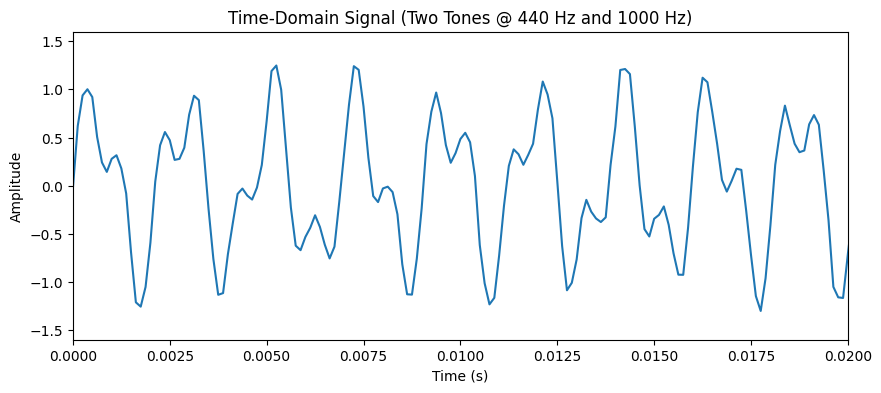

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(t, x)
plt.title("Time-Domain Signal (Two Tones @ 440 Hz and 1000 Hz)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.xlim(0, 0.02)  # zoom into first 20 ms for clarity
plt.show()

### Magnitude Spectrum

In [ ]:
N = len(x)
X = np.fft.rfft(x)                   # one-sided FFT (real input optimization)
freqs = np.fft.rfftfreq(N, d=1/sr)   # corresponding frequencies

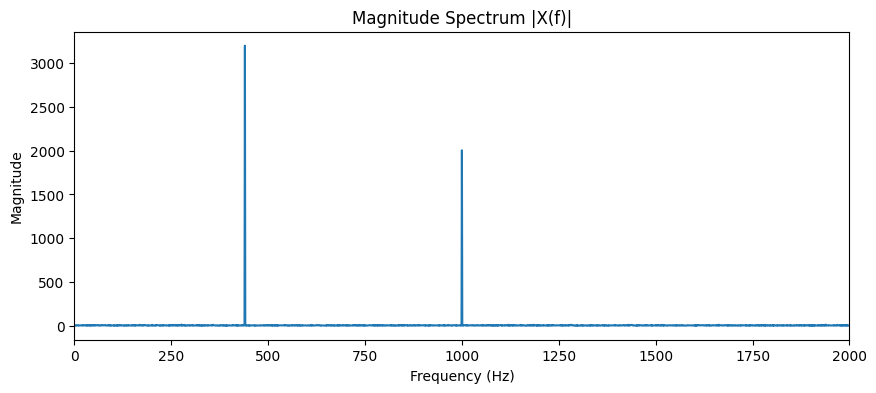

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(freqs, mag)
plt.title("Magnitude Spectrum |X(f)|")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.xlim(0, 2000)  # focus around our tones
plt.show()

### Power Spectrum |X(f)|^2 (in linear scale)

In [ ]:
mag = np.abs(X)

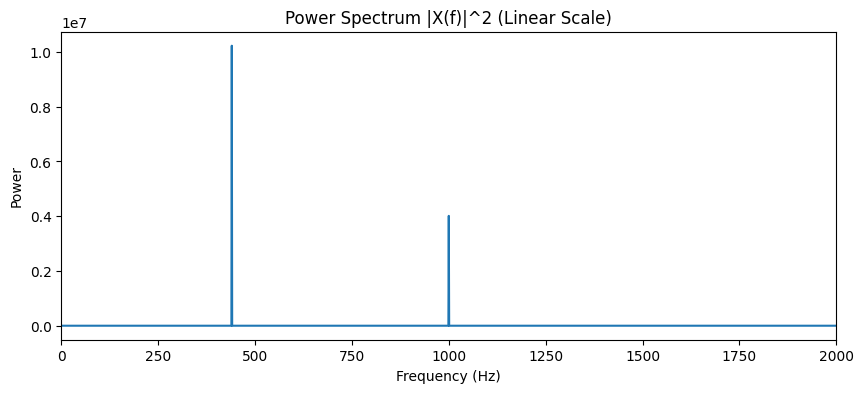

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(freqs, power)
plt.title("Power Spectrum |X(f)|^2 (Linear Scale)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power")
plt.xlim(0, 2000)
plt.show()

### Power Spectrum in dB

In [ ]:
power = mag**2

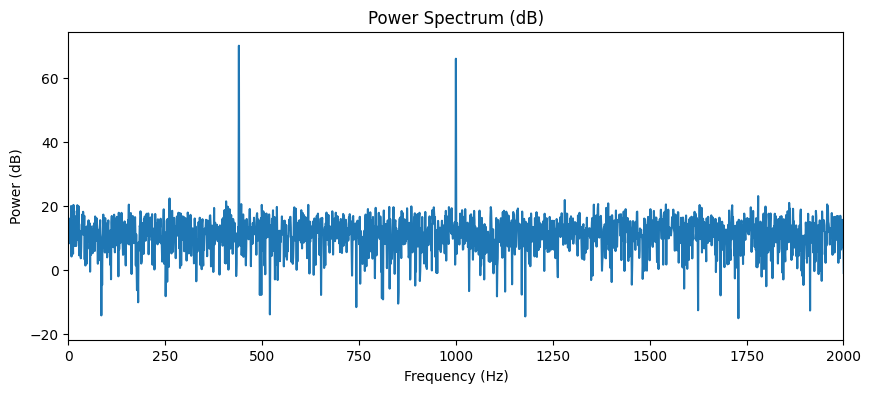

In [ ]:
eps = 1e-12
power_db = 10*np.log10(power + eps)
plt.figure(figsize=(10, 4))
plt.plot(freqs, power_db)
plt.title("Power Spectrum (dB)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power (dB)")
plt.xlim(0, 2000)
plt.show()